# Race Review: Snowbird with Jeff

This is a general page that will display info about a race day.

In [2]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart as ch
import utils
import numpy as np

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

2020-10-28 07:39:32,008|INFO|read_metadata| Read 93 records.
2020-10-28 07:39:32,009|INFO|read_logs| Reading file 2020-03-14_10:24.pd.gz
2020-10-28 07:39:32,425|INFO|read_log_file| Session from 2020-03-14 17:24:06, 99050 rows, 2.7511111111111113 hours.
2020-10-28 07:39:33,578|INFO|read_logs| Found 99046 records before trim.


<IPython.core.display.Javascript object>


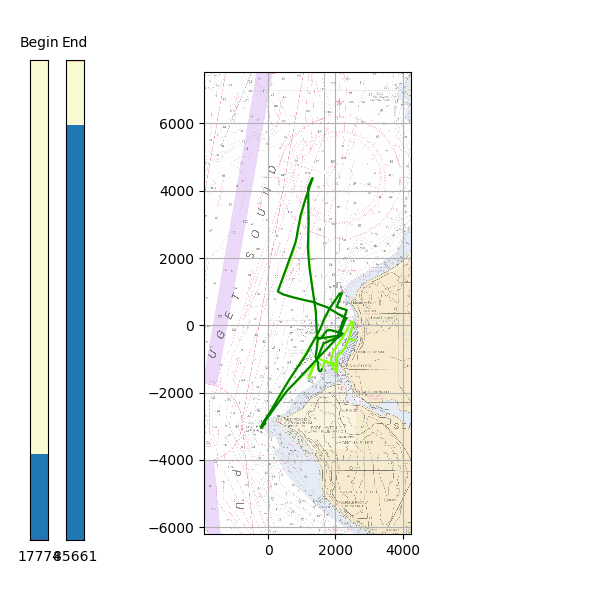

In [4]:
date = '2020-04-01'
df, race = race_logs.read_date(date, race_trim=False)
chart = ch.trim_track(df)

In [5]:
if chart.is_trimmed:
    display("Updating Trim!")
    race_logs.trim_race(race, chart.begin, chart.end)

'Updating Trim!'

2020-10-28 07:39:58,986|INFO|read_metadata| Read 93 records.
2020-10-28 07:39:58,986|INFO|save_metadata| Writing 93 records.


In [63]:
rudder, rrr = p.exponential_filter(np.array(df.rudder), 0.99, 10000)
# rudder = df.rudder
spd, rrr = p.exponential_filter(np.array(df.spd), 0.999, 2)
awa, rrr = p.exponential_filter_angle(np.array(df.awa), 0.999, 10)
df['vmg'] = np.cos(np.radians(df.boat_twa)) * df.spd

<IPython.core.display.Javascript object>


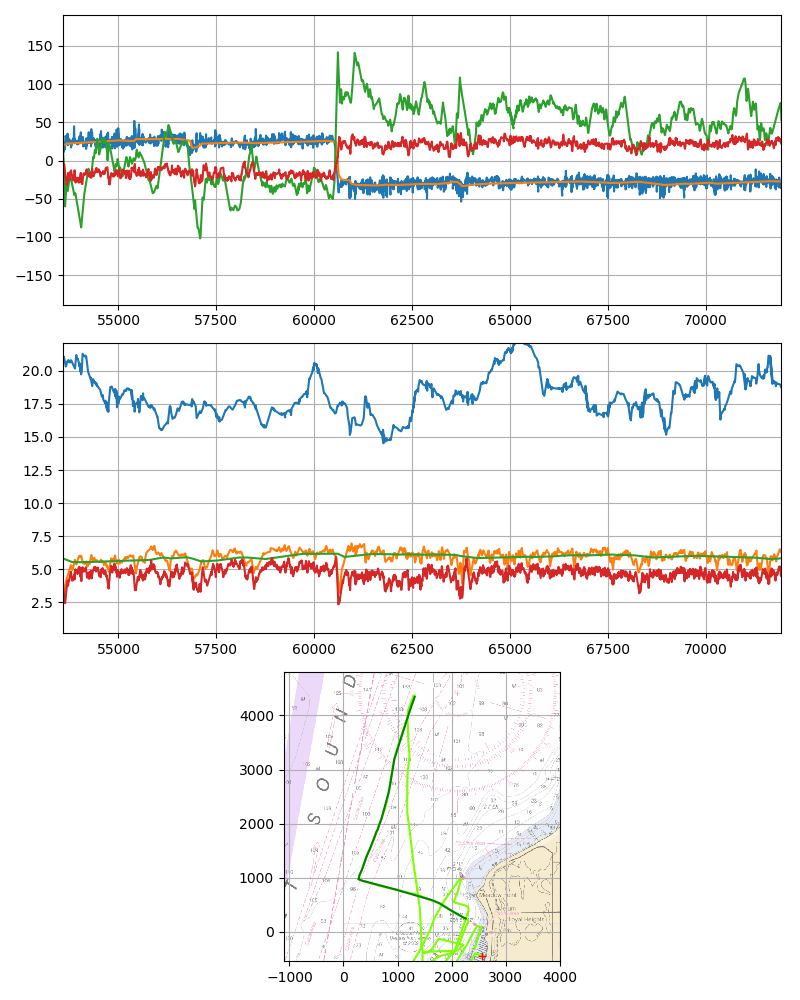

In [65]:
ccc = ch.chart_and_plot(df, None, (df.awa, awa, rudder*10, df.zg100_roll+3.5), (df.tws*1.944, df.spd*1.944, spd*1.944, df.vmg*1.944))

In [67]:
sdf = df.iloc[ccc.begin:ccc.end]
sdf.vmg.mean()*1.944, sdf.spd.mean()*1.944

(4.678685514824283, 5.9351564202593305)

In [48]:
# sdf = df.iloc[61000:71794]
sdf
sdf.zg100_roll.mean()+3.5

21.966342412451365

In [50]:
sdf[sdf.zg100_roll > 0].zg100_roll.mean()

18.466342412451365

In [5]:
df.columns

Index(['rhdg', 'rsog', 'latitude', 'longitude', 'row_seconds', 'turn_rate',
       'rudder', 'zeus_cog', 'zeus_sog', 'raws', 'rawa', 'variation', 'rspd',
       'depth', 'zeus_altitude', 'zeus_gnss_type', 'altitude',
       'geoidal_separation', 'zg100_pitch', 'zg100_roll', 'rcog', 'timestamp',
       'awa', 'aws', 'cawa', 'caws', 'scawa', 'scaws', 'twd', 'tws', 'twa',
       'stwd', 'stws', 'stwa', 'spd', 'sog', 'hdg', 'cog', 'row_times'],
      dtype='object')

<IPython.core.display.Javascript object>


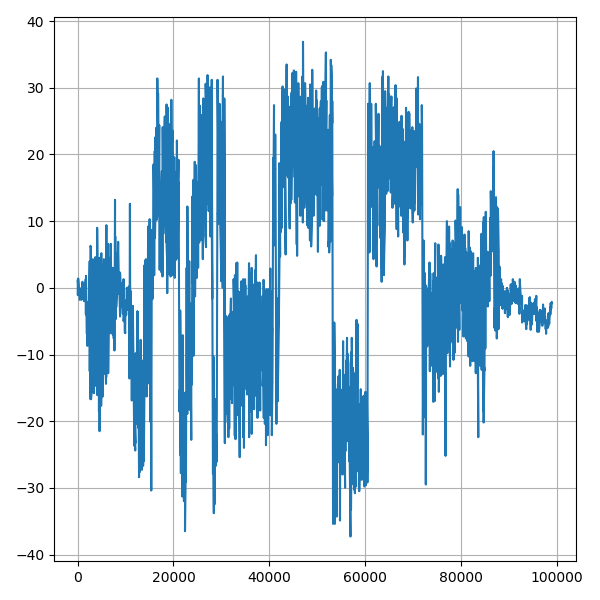

In [52]:
ccc = ch.quick_plot(None, (df.zg100_roll, ))